# Assignment 2: Milestone I Natural Language Processing
## Task 2&3
#### Student Name: KRITI YADAV
#### Student ID: s4109283


Environment: Python 3 and Jupyter notebook

Here are the libraries listed:

1. **pandas**
2. **sklearn.feature_extraction.text** (CountVectorizer, TfidfVectorizer)
3. **gensim** (Word2Vec)
4. **numpy**
5. **matplotlib.pyplot**
6. **seaborn**

Additional libraries used in Task 3:

7. **sklearn.model_selection** (train_test_split, GridSearchCV, cross_val_score)
8. **sklearn.linear_model** (LogisticRegression)
9. **sklearn.metrics** (accuracy_score, classification_report)
10. **sklearn.ensemble** (RandomForestClassifier)

## Introduction

**Task 2:**
In this task, we generate two types of feature representations: Count Vector Representations and Word Embedding Representations. 
- The Count Vector Representation is a sparse matrix where each document is represented as a vector of word counts, while the Word Embedding Representations leverage pre-trained models like Word2Vec to map words into a continuous vector space.
- Additionally, TF-IDF weighting is used to enhance the embedding quality by emphasizing the importance of less frequent words.

**Task 3:**
The objective of this task is to classify clothing reviews based on the feature representations generated in Task 2. 
- We compare the performance of three different models: Logistic Regression using Count Vectors, Logistic Regression using Unweighted Word2Vec Embeddings, and Logistic Regression using TF-IDF Weighted Word2Vec Embeddings.
- Additionally, the impact of including the review title checked on classification performance.

## Importing libraries 


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for task 3
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier





# Task 2. Generating Feature Representations for Clothing Items Reviews

### Generated two types of feature representations
- Count Vector Representation : A sparse matrix where each document is represented as a vector of word counts.
- Word Embedding Representations leverage pre-trained models  Word2Vec to map words into a continuous vector space.
    - Additionally, TF-IDF weighting is used to enhance the embedding quality by emphasizing the importance of less frequent words.

#### **Step 1: Count Vector Representation:**
Generating the Count Vector Representation using the vocabulary (Vocab.txt) generated in Task 1. 
This is done by mapping each processed review to its corresponding word counts based on the vocabulary. 

**Count Vectors (Bag-of-Words Representation):** The count_vectors generated by "vectorizer.transform(clothing['Processed Review'])" produce a sparse matrix where each row corresponds to a review, and each column corresponds to a word from the vocabulary, which is formated and saved as mentioned in the assignment. The entries in the matrix represent the frequency of each word in the review.
**Bag-of-Words model:** a vector that represents the count of words in a given document, without considering their order or context.



**Step 1: Explanantion:**
- Created count vector representations for each review using the vocabulary we built earlier in Task 1.
- Each *review* is represented as a *vector*, where each entry corresponds to the frequency of a word from the vocabulary in the review

-> *Count vectors are a simple but effective way to represent textual data in numerical form, allowing to train models like logistic regression on the data. The vectors will later be used as features for classification.*


In [2]:
# Load the processed reviews and vocabulary from the files
clothing = pd.read_csv('processed.csv')

# Load vocabulary from vocab.txt
with open('vocab.txt', 'r') as f:
    vocab = {line.split(':')[0]: int(line.split(':')[1]) for line in f.readlines()}

# Create CountVectorizer using the vocabulary
vectorizer = CountVectorizer(vocabulary=vocab.keys())

# Generate count vectors
count_vectors = vectorizer.transform(clothing['Processed Review'])


# Print the first review's count vector
print("Count Vector for the first review:")
print(count_vectors[0].toarray())  # Convert sparse matrix to dense array
print(f"\n -> The zeros in the output represent words in the vocabulary that do not appear in the first review. Only a few entries in the vector will be non-zero, representing words that are actually present in the review.")

# Check the first few lines of the count_vectors
print(f"\n Shape of count_vectors: {count_vectors.shape}")

## **Interpreting the Sparse Vector:**
## Focusing on the actual non-zero word counts (the words that appear in the review) rather than the entire vector.

# Find indices of non-zero word counts for the first review
non_zero_indices = count_vectors[0].nonzero()  # This returns the indices of non-zero elements
print(f"\n Non-zero indices in the count vector for the first review: {non_zero_indices[1]}")



Count Vector for the first review:
[[0 0 0 ... 0 0 0]]

 -> The zeros in the output represent words in the vocabulary that do not appear in the first review. Only a few entries in the vector will be non-zero, representing words that are actually present in the review.

 Shape of count_vectors: (19662, 7548)

 Non-zero indices in the count vector for the first review: [ 688 1030 1246 1721 1797 2295 2443 2490 2611 2902 3020 3097 3203 3268
 3559 3562 3843 3945 4235 4246 4412 4440 4653 5274 5682 5880 5978 6743
 6799 7110 7225 7425 7539 7541]


---
### **Step 2: Word Embedding Representations (Using Word2Vec):**
- Word2Vec, a word embedding technique that learns vector representations of words based on their context in a corpus. In this step, Word2Vec model was trained on the processed reviews and generate two types of document embeddings:

    - **Unweighted Embeddings**: Each word in a review is mapped to its corresponding embedding, and the review is represented as the mean of these embeddings.(2.1)
    - **TF-IDF Weighted Embeddings**: The importance of each word in a review is weighted using TF-IDF, where infrequent words get higher weights.(2.2)


**Step2.1: Explaination:**

- Word2Vec model was trained on the processed reviews, which learns to map each word into a **300-dimensional vector** based on its context in the review.
- Then  each review was represented by averaging the vectors of the words it contains (unweighted).

*Word2Vec embeddings capture **semantic relationships between words**. For example, "dress" and "gown" may have similar embeddings, reflecting their similar meanings. This allows us to represent reviews in a more informative way than count vectors alone.*



In [3]:
# Training Word2Vec model on processed reviews
sentences = [review.split() for review in clothing['Processed Review']]
word2vec_model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)

# Saved Word2Vec model for future use
word2vec_model.save("word2vec_model.model")

# Generated unweighted embeddings
def get_unweighted_embedding_word2vec(review, model):
    words = review.split()
    embedding_matrix = [model.wv[word] for word in words if word in model.wv]
    return np.mean(embedding_matrix, axis=0) if embedding_matrix else np.zeros(300)

# Applying Word2Vec embeddings for unweighted representation
clothing['Unweighted Embedding'] = clothing['Processed Review'].apply(lambda x: get_unweighted_embedding_word2vec(x, word2vec_model))



**Step 2.2 Explanation:**
- **TF-IDF weighting** is used to adjust the importance of each word when calculating the review embeddings.
- TF-IDF ensures that more important words (those that occur frequently in a specific review but not across the whole corpus) are weighted higher.
  
*Combined TF-IDF and Word2Vec, and balanced both frequency and contextual meaning. This is useful for capturing the essence of reviews with fewer but significant words.*


In [4]:
#Step 2.2
# Initialized TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(vocabulary=vocab.keys())
tfidf_vectors = tfidf_vectorizer.fit_transform(clothing['Processed Review'])

def get_tfidf_weighted_embedding_word2vec(review, tfidf_vectorizer, model):
    words = review.split()
    embedding_matrix = []
    for word in words:
        if word in model.wv and word in tfidf_vectorizer.vocabulary_:
            weight = tfidf_vectorizer.idf_[tfidf_vectorizer.vocabulary_[word]]
            embedding_matrix.append(model.wv[word] * weight)
    return np.mean(embedding_matrix, axis=0) if embedding_matrix else np.zeros(300)

# Apply TF-IDF weighted embeddings to each review
clothing['TF-IDF Weighted Embedding'] = clothing['Processed Review'].apply(lambda x: get_tfidf_weighted_embedding_word2vec(x, tfidf_vectorizer, word2vec_model))





###  Working of TF-IDF Weighted Embedding using Word2Vec

1. **Word2Vec Embeddings**:
   Word2Vec generates word vectors by analyzing the contextual relationships between words. Each word is assigned a multi-dimensional vector, and words used in similar contexts are placed closer together in the vector space. However, this step does not consider the relative importance of each word in the dataset, treating all words equally.

2. **TF-IDF Weighting**:
   The TF-IDF process refines the embedding by adjusting the significance of words based on their frequency in individual reviews and across the entire dataset. Specifically:
   - **Term Frequency (TF)** assigns higher weights to words that appear frequently in a particular review.
   - **Inverse Document Frequency (IDF)** downweights words that appear across many reviews, reducing their impact if they are common throughout the dataset. Words unique to certain reviews receive higher weights. This adjustment ensures that more unique, review-specific terms are emphasized, while generic terms are de-emphasized. The resulting TF-IDF weights are applied to the original Word2Vec embeddings.

3. **Magnitude Calculation (L2 Norm)**:
   After applying TF-IDF weights, the magnitude (L2 norm) of each word vector is calculated. A larger magnitude indicates that the word is both semantically important (from the Word2Vec representation) and has a high TF-IDF score, indicating that it is particularly relevant to the specific context. Smaller magnitudes suggest the word is less informative.

---


## Visual Comparison of Unweighted vs TF-IDF Weighted Embedding  in Clothing Data

1.  **Visual line chart comparing Unweighted vs TF-IDF Weighted Embedding**
      - The code compares the Unweighted Embedding and TF-IDF Weighted Embedding of a review by plotting the difference in how each embedding represents the review, highlighting the variance in word importance using TF-IDF using a line chart.

2. **Plotting a Bar Chart for Top 10 Words with Lowest and Highest TF-IDF Embedding Magnitudes**
      - The chart plots the 10 words with the lowest embedding magnitudes (less important words like "eit" and "impress") and the 10 words with the highest magnitudes (more important words like "price" and "compliments"). It visually represents the impact of TF-IDF on word importance in the dataset.


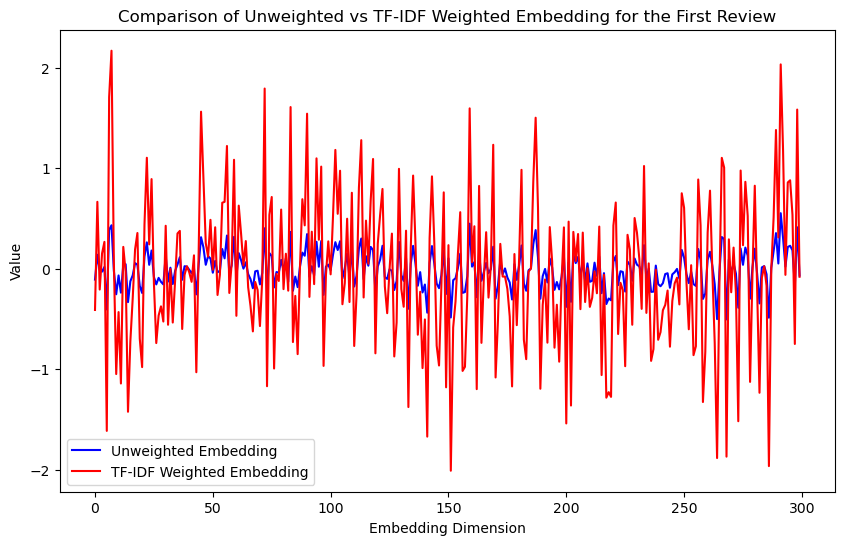

In [5]:
# Round the unweighted embedding for the first review
rounded_unweighted_embedding = [round(value, 3) for value in clothing['Unweighted Embedding'].iloc[0]]

# Round the TF-IDF weighted embedding for the first review
rounded_tfidf_embedding = [round(value, 3) for value in clothing['TF-IDF Weighted Embedding'].iloc[0]]

# Comparison of Unweighted and TF-IDF Weighted Embeddings
plt.figure(figsize=(10, 6))

# Unweighted embedding
plt.plot(rounded_unweighted_embedding, label='Unweighted Embedding', color='blue')

# TF-IDF weighted embedding
plt.plot(rounded_tfidf_embedding, label='TF-IDF Weighted Embedding', color='red')
plt.title('Comparison of Unweighted vs TF-IDF Weighted Embedding for the First Review')
plt.xlabel('Embedding Dimension')
plt.ylabel('Value')
plt.legend()
plt.show()


### **Interpretations are as follows:** 

1. **TF-IDF Weighting Enhances Word Importance**:In the TF-IDF weighted embedding, terms that are more meaningful within a particular review are given greater importance, thus increasing their influence in the resulting embedding. This can be seen in the higher values across specific dimensions in the TF-IDF embedding, as shown by the **red** line in the plot above.
    - Frequently occurring domain-specific terms like "impress" or "comfortable" may still be present, even after stopword removal. In the TF-IDF model, these terms are **downweighted**, while more important words like "fit," "price," or "quality," which are key to determining the classification or recommendation in clothing reviews, are given **higher weights**, as shown in the graph.
    - This reweighting ensures that the TF-IDF weighted embedding provides a more informative feature set for classification tasks, helping the model to focus on words that matter most.

2. **Unweighted Embedding as a Baseline Representation(blue line in graph)**:Unweighted embeddings represent a general approach where all words in a review contribute equally to the overall vector.
    - In this method, **word embeddings are averaged without considering their individual importance**. This can lead to a dilution of the significance of more  informative terms, as all words—whether common or rare—are **treated equally**. 
    - This method offers a decent baseline for simple tasks; however, it becomes less effective when certain words have a stronger influence on the review’s sentiment or content. For example, in a review where words like "fit" or "tight" are crucial for determining sentiment, equal weighting reduces the importance of these key terms.

4. **Suitability of TF-IDF Weighted Embedding for Downstream Tasks**:The greater variance observed in the TF-IDF weighted embedding allows it to perform **more effectively** in downstream tasks like **classification**. 
    - TF-IDF emphasizes specific dimensions (shown as high peaks or deep valleys), which *provides the model with clearer, more informative values which helps in predicting outcomes*—such as whether a review is positive or negative.
  

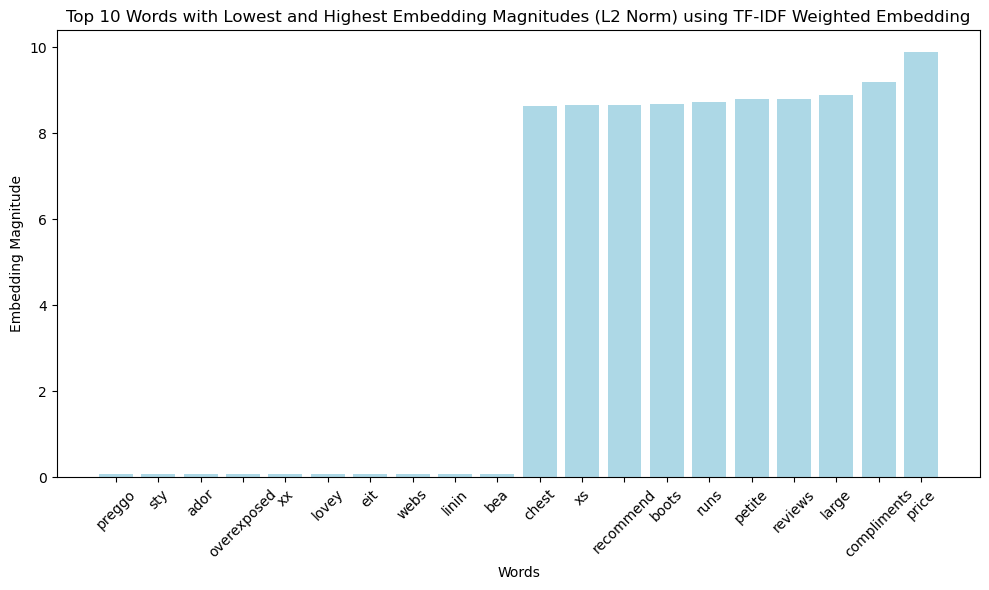

In [6]:

words = list(word2vec_model.wv.index_to_key)
#words = list(word2vec_model.wv.index_to_key): This retrieves all the words in the vocabulary of the trained Word2Vec model.

# Create an empty list to hold each word and its corresponding embedding magnitude
word_magnitudes = []

# Loop through all words to calculate the L2 norm (magnitude) of each word's embedding
for word in words:
    embedding = word2vec_model.wv[word]
    magnitude = np.linalg.norm(embedding)  # Calculating the size of the embedding vector
    word_magnitudes.append((word, magnitude))
#np.linalg.norm(embedding): For each word, the magnitude (L2 norm) of its embedding is computed.

# Sort the list of words by the magnitude, from smallest to largest
word_magnitudes.sort(key=lambda x: x[1])

# Get the 10 words with the smallest magnitudes and the 10 words with the largest magnitudes
low_mag_words = word_magnitudes[:10] #lowest_magnitude_words: The 10 words with the lowest embedding magnitudes (less influential or neutral).
high_mag_words = word_magnitudes[-10:] #The 10 words with the highest embedding magnitudes (more influential or relevant).

# Combine the smallest and largest magnitude words for comparison in the plot
words_to_plot = [word for word, _ in low_mag_words + high_mag_words]
magnitudes_to_plot = [magnitude for _, magnitude in low_mag_words + high_mag_words]

plt.figure(figsize=(10, 6))
plt.bar(words_to_plot, magnitudes_to_plot, color='lightblue')
plt.title('Top 10 Words with Lowest and Highest Embedding Magnitudes (L2 Norm) using TF-IDF Weighted Embedding')
plt.xlabel('Words')
plt.ylabel('Embedding Magnitude')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### **Explanation of High-Scoring Words**:

Words : **"price," "compliments," and "recommend"** shows high magnitudes due to:
1. **Contextual Relevance**: These words appear in specific contexts within reviews, where their meanings carry more significance. For example, "price" is associated with discussions about cost, and "recommend" often signals a positive evaluation.
   
2. **TF-IDF Influence**:  These words are not just frequent within a review but also unique to specific reviews. For instance, "compliments" and "recommend" might not appear in every review, but when they do, they carry significant meaning (e.g., whether the reviewer is recommending the product). Similarly, "price" might appear in more specific reviews discussing value or affordability, making it more important in those contexts.

### **Explanation of Low-Scoring Words**:

Words like **"eit," "impress," and "blu"** display low magnitudes for the following reasons:
1. **Limited Relevance**: These words may be abbreviations, misspellings, or terms that hold little significance in the context of the reviews. Their usage may not substantially affect the meaning or sentiment of the text.
   
2. **Low TF-IDF Scores**: These words are either too rare across the reviews or, if they do appear, they may not contribute much to the review's meaning. For example, abbreviations like "blu" may appear in only a few documents and are thus given a lower weight by TF-IDF.

### Conclusion:

Words with **higher embedding magnitudes** (e.g., "price" and "recommend") are more influential, as they provide specific insights that contribute to review classification or recommendation. In contrast, words with **lower magnitudes** (e.g., "eit" and "blu") contribute less to the analysis due to their lack of contextual importance or relevance. The combination of **Word2Vec's semantic relationships** and **TF-IDF's focus on word importance** allows the model to prioritize terms that are more likely to drive accurate predictions and insights in downstream tasks.

---

### Saving outputs
Save the count vector representation as per spectification.
- count_vectors.txt

In [7]:
# Save count vectors
with open('count_vectors.txt', 'w') as f:
    for idx, row in enumerate(count_vectors):
        counts = row.toarray().flatten()
        non_zero = [(i, counts[i]) for i in range(len(counts)) if counts[i] > 0]
        sparse_repr = ','.join([f"{i}:{count}" for i, count in non_zero])
        f.write(f"#{idx}, {sparse_repr}\n")
print("Count vectors saved to 'count_vectors.txt'")

Count vectors saved to 'count_vectors.txt'


In [8]:

# Saving the unweighted embeddings to a CSV file
clothing[['Processed Review', 'Unweighted Embedding']].to_csv('unweighted_embeddings.csv', index=False)

print("Unweighted embeddings saved to 'unweighted_embeddings.csv'")

Unweighted embeddings saved to 'unweighted_embeddings.csv'


In [9]:
# Saving the TF-IDF weighted embeddings to a CSV file
clothing[['Processed Review', 'TF-IDF Weighted Embedding']].to_csv('tfidf_weighted_embeddings.csv', index=False)

print("TF-IDF weighted embeddings saved to 'tfidf_weighted_embeddings.csv'")


TF-IDF weighted embeddings saved to 'tfidf_weighted_embeddings.csv'


# Task 3. Clothing Review Classification

### Step 1: Loading the feature representations file saved in the above task 2  

In [ ]:

# Step 1: Reading the Count Vectors from count_vectors.txt
count_vectors_data = []

# Read the count_vectors.txt file and parse the sparse representation
with open('count_vectors.txt', 'r') as file:
    for line in file:
        if line.startswith('#'):
            # Remove '#' and split the line by commas
            parts = line.strip().split(',')
            review_index = int(parts[0].replace('#', ''))  # Review index
            word_frequencies = {int(x.split(':')[0]): int(x.split(':')[1]) for x in parts[1:]}  # Word index:freq dict
            
            # Append the sparse vector to the list
            count_vectors_data.append(word_frequencies)

# Step 2: Convert the Sparse Data into a DataFrame (filling missing values with 0)
vocab_size = max([max(vector.keys()) for vector in count_vectors_data]) + 1  # Determine the vocabulary size
count_vectors_df = pd.DataFrame([{i: word_frequencies.get(i, 0) for i in range(vocab_size)} for word_frequencies in count_vectors_data])

print("Count vectors loaded successfully.")

# Step 3: Loading other feature representations (Unweighted and TF-IDF embeddings)
unweighted_embeddings = pd.read_csv('unweighted_embeddings.csv')  # Unweighted Word2Vec embeddings
tfidf_weighted_embeddings = pd.read_csv('tfidf_weighted_embeddings.csv')  # TF-IDF weighted embeddings
clothing = pd.read_csv('processed.csv')  # Processed review data with the target variable


### Step 2: Feature Representation and Model Evaluation 

**Target Variable (`y`):** The target variable is assigned as `Recommended IND`, which indicates whether a clothing item is recommended (1) or not (0). This is crucial for performing supervised learning tasks, particularly in predicting recommendations.

**Function `convert_string_to_array()` Usage:** This function converts the string representations of word embeddings (from the CSV file) into NumPy arrays for both the unweighted and TF-IDF weighted embeddings. The conversion ensures that these embeddings are in a numerical format which are suitable for machine learning models. *Embeddings are used to create a richer semantic representation of the review text, allowing for context-aware feature vectors.* 

#### **Data Splitting (80/20 Split):**
- **`train_test_split()`** is used to split the dataset into:
  - **Training set (80%)**: For model training.
  - **Testing set (20%)**: For evaluating model performance on unseen data.
*Using a larger training set (80%) minimizes the risk of overfitting, where the model captures specific patterns from the training data but fails to generalize to unseen data. Meanwhile, having a smaller test set (20%) ensures the model is evaluated effectively without leading to underfitting.*

- The data is split across various feature representations (Count Vectors, Unweighted Embeddings, and TF-IDF Weighted Embeddings). This enables a comparison of models trained using different input types.
- Assigning `random_state=42` guarantees that every time the code is executed, the data splitting process will be identical, ensuring consistency and reproducibility of results. Adjusting the random_state changes the randomness in the split but does not alter the model’s learning process. *Maintaining the same random_state allows for a reliable comparison of results across different runs with identical data distributions.*

#### **Model Definitions (Logistic Regression & Random Forest):**
- **Logistic Regression**: A straightforward and interpretable model, effective for binary classification tasks such as predicting whether an item is recommended or not.
- **Random Forest**: An ensemble model that captures more complex relationships by building multiple decision trees and combining their results.

#### **Analytical Insights:**
- Embeddings (both unweighted and TF-IDF weighted) provide a richer semantic context than raw count vectors, and are expected to improve model performance.
  
- **Aim:** The primary objective is to evaluate the effectiveness of different feature representations, such as **Count Vectors, Unweighted Embeddings, and TF-IDF Weighted Embeddings**, in producing the highest accuracy. Logistic Regression and Random Forest are used as tools to observe how these feature combinations perform across different models. Ultimately, the focus is on determining which feature representation leads to the best accuracy, regardless of the model, while analyzing how each combination behaves within both models to identify the most accurate representation.

- **Models:**
  - Logistic Regression serves as a baseline due to its simplicity and interpretability.
  - Random Forest is suitable for capturing more intricate, non-linear relationships between the features and the target variable.

**Expected Outputs:** The accuracy and classification reports will provide insight into which model and feature representation combination is most effective for classifying clothing item recommendations.

**5-Fold Cross Validation:** This method ensures that model performance is tested across different subsets of data, providing more robust and reliable results. Combining the title and review text leverages additional context, potentially improving the accuracy of recommendation predictions.

---

In [ ]:

# Assigning y to target variable (whether the review is recommended or not) from the processed data set. 
y = clothing['Recommended IND']

# Converting embeddings (stored as strings) to NumPy arrays for unweighted and TF-IDF embeddings

def convert_string_to_array(embedding_string):
    """
    Converts string representation of embeddings to a NumPy array.
    Example input: "[1.23, -0.56, ...], done so that the machine learning models can easily process the data "
    """
    return np.array([float(num) for num in embedding_string.strip('[]').split()])

# Converting the string embeddings to NumPy arrays for both Unweighted and TF-IDF weighted embeddings
X_unweighted = np.stack(unweighted_embeddings['Unweighted Embedding'].apply(convert_string_to_array))
X_tfidf_weighted = np.stack(tfidf_weighted_embeddings['TF-IDF Weighted Embedding'].apply(convert_string_to_array))

# Spliting the Data into Training and Testing Sets (80% Train, 20% Test)
# This is done for count vectors, unweighted embeddings, and TF-IDF embeddings

# Count Vectors
X_train_count, X_test_count, y_train, y_test = train_test_split(count_vectors_df, y, test_size=0.2, random_state=42)

# Unweighted Embeddings
X_train_unweighted, X_test_unweighted = train_test_split(X_unweighted, test_size=0.2, random_state=42)

# TF-IDF Weighted Embeddings
X_train_tfidf_weighted, X_test_tfidf_weighted = train_test_split(X_tfidf_weighted, test_size=0.2, random_state=42)

# Models (Logistic Regression and Random Forest)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}


In [ ]:

def evaluate_model_with_cross_validation(X, y, model):
   
    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    
    # Print the average accuracy and standard deviation across 5 folds
    print(f"Average Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")



for model_name, model in models.items():
    print(f"\n--- {model_name} with Count Vectors ---")
    evaluate_model_with_cross_validation(count_vectors_df, y, model)
    
    print(f"\n--- {model_name} with Unweighted Embeddings ---")
    evaluate_model_with_cross_validation(X_unweighted, y, model)
    
    print(f"\n--- {model_name} with TF-IDF Weighted Embeddings ---")
    evaluate_model_with_cross_validation(X_tfidf_weighted, y, model)


**Conclusion from the above accuracy report** : Count vectors consistently provide higher accuracy compared to both unweighted and TF-IDF embeddings across Logistic Regression and Random Forest models. In comparison to Random foreset Logistic Regression shows the best results, particularly when using TF-IDF embeddings. Given their effectiveness, count vectors were selected for further testing, with the next phase focusing on combining the title and review text to optimize model performance.

In [ ]:

# feature representations based on the title, review text, and combined text
# 2.1: Feature Representation for Titles Only
title_vectorizer = CountVectorizer()  # Used Countvector as the above reports are giving high accuracy using the same
X_title_count = title_vectorizer.fit_transform(clothing['Title'].fillna(''))  # Handling missing titles

# 2.2: Feature Representation for Review Text Only (already done in Task 3)
review_vectorizer = CountVectorizer()  # Used Countvector as the above reports are giving high accuracy using the same
X_review_count = review_vectorizer.fit_transform(clothing['Processed Review'])

# 2.3: Feature Representation for Both Title and Review Text (Concatenated)
clothing['combined'] = clothing['Title'].fillna('') + ' ' + clothing['Processed Review']  # Concatenate title and review
combined_vectorizer = CountVectorizer() # Used Countvector as the above reports are giving high accuracy using the same
X_combined_count = combined_vectorizer.fit_transform(clothing['combined'])


In [ ]:

# Step 5: Compare Models Using Different Feature Representations and 5-Fold Cross Validation
for model_name, model in models.items():
    print(f"\n--- {model_name} with Titles Only (Count Vectors) ---")
    evaluate_model_with_cross_validation(X_title_count, y, model)
    
    print(f"\n--- {model_name} with Review Text Only (Count Vectors) ---")
    evaluate_model_with_cross_validation(X_review_count, y, model)
    
    print(f"\n--- {model_name} with Both Title and Review Text (Count Vectors) ---")
    evaluate_model_with_cross_validation(X_combined_count, y, model)


### Conclusion:

- The best results given by Logistic Regression using both the title and review text, achieving an accuracy of **90.13%**. This indicates that combining both sources of information improves the model's ability to understand the data.
- **Logistic Regression vs. Random Forest**: Logistic Regression performed better with more complex input data (title + review text), while Random Forest showed stronger performance with simpler data (titles only).
- **Consistency**: Random Forest exhibited lower variance, making it more stable across different data splits, but Logistic Regression achieved higher accuracy with more features.
- For Random Forest, adding both title and review text did not improve performance and, in some cases, led to a decrease in accuracy compared to using just the titles.

**Next Step:** The results shows that combining title and review text improves model performance, especially for Logistic Regression. Future steps could involve testing additional feature representations (such as TF-IDF) or fine-tuning the models further to achieve better results.

## Testing Additional Feature Representations TF-IDF and Fine-Tuning Logistic Regression:
1.  **Objective**: Improving Model Performance:The goal is to identify the best combination of features and model configurations that produce the highest accuracy for classifying clothing item recommendations.
TF-IDF vs. Count Vectors: TF-IDF captures the importance of words in the context of the entire dataset (highlighting less frequent but informative words), while count vectors treat every word equally, which can dilute important details.
2.  **Fine-Tuning Logistic Regression**: By fine-tuning Logistic Regression, we can make the model more effective at capturing patterns within the data:
   - Regularization (C Parameter): This parameter controls the trade-off between fitting the training data perfectly and keeping the model generalizable to new data
   - (Maximum Iterations (max_iter): The model used optimization process to find the best solution. If the process does not converge, increasing the number of iterations (max_iter) can help prevent overfitting.
   - Solver : lbfgs and liblinear checking which one works best for this clothing dataset.

*Using GridSearchCV finding different combinations of these hyperparameters and find the best optimal settings that will maximize model accuracy.*

3. **Comparing TF-IDF and Count Vectors**: Comparing these two approaches to understand which representation of the text helps the model focus on more important aspects of the reviews.
This process will allows us to make data-driven decisions about which features and models are most effective for the task of predicting clothing item recommendations.

In [ ]:
# Step 2: Create feature representations based on TF-IDF
# 2.1: TF-IDF Feature Representation for Titles Only
title_tfidf_vectorizer = TfidfVectorizer()  # TF-IDF for Titles
X_title_tfidf = title_tfidf_vectorizer.fit_transform(clothing['Title'].fillna(''))  # Handle missing titles

# 2.2: TF-IDF Feature Representation for Review Text Only
review_tfidf_vectorizer = TfidfVectorizer()  # TF-IDF for Review Text
X_review_tfidf = review_tfidf_vectorizer.fit_transform(clothing['Processed Review'])

# 2.3: TF-IDF Feature Representation for Both Title and Review Text (Concatenated)
clothing['combined'] = clothing['Title'].fillna('') + ' ' + clothing['Processed Review']  # Concatenating Title and Review Text
combined_tfidf_vectorizer = TfidfVectorizer()  # TF-IDF for concatenated text
X_combined_tfidf = combined_tfidf_vectorizer.fit_transform(clothing['combined'])


In [ ]:

# Split Data into Training and Testing Sets (80% Train, 20% Test)
# Splitting for each feature representation
X_train_title, X_test_title, y_train, y_test = train_test_split(X_title_tfidf, y, test_size=0.2, random_state=42)
X_train_review, X_test_review = train_test_split(X_review_tfidf, test_size=0.2, random_state=42)
X_train_combined, X_test_combined = train_test_split(X_combined_tfidf, test_size=0.2, random_state=42)

# Define Logistic Regression Model with Hyperparameter Tuning using GridSearchCV
# Defining the parameter grid to fine-tune Logistic Regression
param_grid = {
    'C': [0.05, 0.5, 5, 50, 500],  # Adjusted regularization parameter
    'max_iter': [800, 1200, 1500],  # Here we increased max iterations
    'solver': ['lbfgs', 'newton-cg'],  # Used different solvers for logistic regression
}

log_reg = LogisticRegression()

# Step 5: Grid Search with Cross Validation for Hyperparameter Tuning
def fine_tune_model(X_train, y_train):
    """
    Fine-tune the Logistic Regression model using GridSearchCV.
    """
    grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_

# Step 6: Evaluate the Fine-Tuned Model
def evaluate_fine_tuned_model(X_train, X_test, y_train, y_test, model):
    """
    Trains and evaluates the fine-tuned Logistic Regression model.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:

# Step 7: Perform Experiments with TF-IDF Representations and Fine-Tuning
# Fine-tuning and evaluating for Title Only
print("\n--- Fine-tuning Logistic Regression with TF-IDF Titles Only ---")
best_log_reg_title = fine_tune_model(X_train_title, y_train)
evaluate_fine_tuned_model(X_train_title, X_test_title, y_train, y_test, best_log_reg_title)

# Fine-tuning and evaluating for Review Text Only
print("\n--- Fine-tuning Logistic Regression with TF-IDF Review Text Only ---")
best_log_reg_review = fine_tune_model(X_train_review, y_train)
evaluate_fine_tuned_model(X_train_review, X_test_review, y_train, y_test, best_log_reg_review)

# Fine-tuning and evaluating for Combined Title + Review Text
print("\n--- Fine-tuning Logistic Regression with TF-IDF Combined Text ---")
best_log_reg_combined = fine_tune_model(X_train_combined, y_train)
evaluate_fine_tuned_model(X_train_combined, X_test_combined, y_train, y_test, best_log_reg_combined)

Result: 

The results show an improvement in accuracy from **90.13% (using Count Vectors)** to **91.08% with TF-IDF embeddings** after fine-tuning the Logistic Regression model. The **best cross-validation accuracy** also improved to **90.32%** when using the combination of title and review text with TF-IDF embedding, demonstrating that TF-IDF allows for a more nuanced understanding of the text. 

**Conclusion**: Fine-tuning with TF-IDF embeddings and combining the title with review text provides better model performance compared to using count vectors alone. The model captures richer, context-aware features, leading to more accurate predictions. This approach should be considered for further exploration and model refinement.

**Classification report**:  It provides important metrics for evaluating the fine-tuned Logistic Regression model using TF-IDF combined text. For class 1 (recommended items), the model shows strong performance with a precision of 0.93, meaning it correctly identifies 93% of the true positives. The recall is even higher at 0.96, showing that 96% of the actual positive cases are successfully retrieved. For class 0 (non-recommended items), the precision is 0.79, with a recall of 0.68, indicating the model has more difficulty accurately identifying non-recommended items, leading to more false negatives. 

Overall, the model achieves an accuracy of 91.08%, with a macro average F1-score of 0.84 and a weighted average F1-score of 0.91. While the model excels at predicting recommended items, there's room for improvement in classifying non-recommended ones.

## Summary


In Task 2, we generated Count Vector Representations using the vocabulary (Vocab.txt) from Task 1, mapping each processed review to word counts based on the vocabulary. The result was a sparse matrix where each row represented a review, and each column represented a word’s frequency, following the Bag-of-Words model. Next, we explored Word Embedding Representations using Word2Vec. The model produced two types of document embeddings: Unweighted Embeddings: Reviews were represented as the mean of word embeddings.TF-IDF Weighted Embeddings: Word importance was adjusted using TF-IDF, giving more weight to rare, review-specific words. TF-IDF weighting process adjusted the significance of each word, ensuring that more unique words were emphasized, and common words were de-emphasized. We visually compared the two embeddings using a line chart to highlight differences and plotted a bar chart showing the top 10 words with the highest and lowest embedding magnitudes. This highlighted which words had the most influence in the dataset, helping prioritize contextually important terms for accurate predictions in future tasks.

In Task 3, the target variable `Recommended IND` was defined to predict whether a clothing item was recommended (1) or not (0). The main objective was to compare different feature representations (Count Vectors, Unweighted Embeddings, and TF-IDF) using machine learning models where I decided to have to models to have a better comparitive view intially Logistic Regression and Random Forest models to determine the best accuracy. To ensure reliable results, 5-fold cross-validation was applied. Initial results showed that Count Vectors consistently provided the highest accuracy across models, with Logistic Regression achieving 90.13% accuracy using combined title and review text. Hyperparameter tuning via GridSearchCV was then applied to fine-tune the Logistic Regression model with TF-IDF embeddings, improving accuracy to 91.08%. This fine-tuning enabled the model to better capture context-aware information, leading to more accurate predictions. Ultimately, the use of TF-IDF embeddings with fine-tuning outperformed Count Vectors, particularly when combining title and review text.